# Spread of Fake News

This notebook presents the results for the simulation of the spread of fakenews considering the scenario where people join a public group with unknown participants in Brazil and in the UK.

1. Public Groups (22\% - Brazil)
2. Public Groups (8\% - UK)
3. No Public Groups


* Last update: 2020-07-03
* Coder: Eric Araujo


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

import seaborn as sns; sns.set(color_codes=True)
from matplotlib import cm

import glob

from lib.get_df import Results

#from scipy.stats import pearsonr


In [2]:
res = Results()

In [3]:
res.all_df.head()

,run,fakenews_rate,public_groups,num_users,graphics,perc_pub_groups,step,total_posts,shared_posts,fakenews_posts,fakenews_shared,pub_group_users,group0_users,group1_users,group2_users,avg_posts_per_user,db
0,1,10,True,1000,False,8,0,0,0,0,0,70,956,21,23,0.000,0
1,1,10,True,1000,False,8,1,27,0,2,0,70,956,21,23,0.027,0
2,1,10,True,1000,False,8,2,255,191,5,4,70,956,21,23,0.064,0
3,1,10,True,1000,False,8,3,1458,1359,8,73,70,956,21,23,0.099,0
4,8,10,True,1000,False,8,0,0,0,0,0,79,946,26,28,0.000,0


In [4]:
set(res.all_df.perc_pub_groups)

{8, 22}

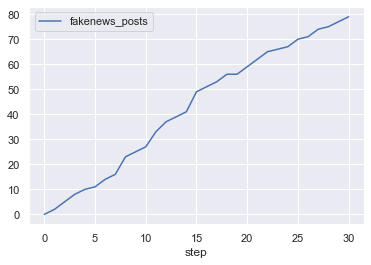

In [5]:
#ax = res.all_df[res.all_df.run == 1].groupby('step')[[]].plot()
#res.all_df[res.all_df.run == 2].groupby('step').mean()[['infected_num', 'hospit_num', 
#                                                        'symptoms_num', 'icu_num']].plot(ax=ax)
res.all_df[res.all_df.run == 1].groupby('step')[['fakenews_posts']].sum().plot()

## Results DF

In [6]:
no_pg_df = res.all_df[(res.all_df.public_groups == False)]

pg_BR_df = res.all_df[(res.all_df.public_groups == True) & 
                      (res.all_df.perc_pub_groups == 22)
                     ]
pg_UK_df = res.all_df[(res.all_df.public_groups == True) & 
                      (res.all_df.perc_pub_groups == 8)
                     ]

In [7]:
len(no_pg_df), len(pg_BR_df), len(pg_UK_df)

(620, 310, 310)

## Basic graphic for mean number of fakenews posts created in each scenario

Text(0, 0.5, 'Quantidade de posts')

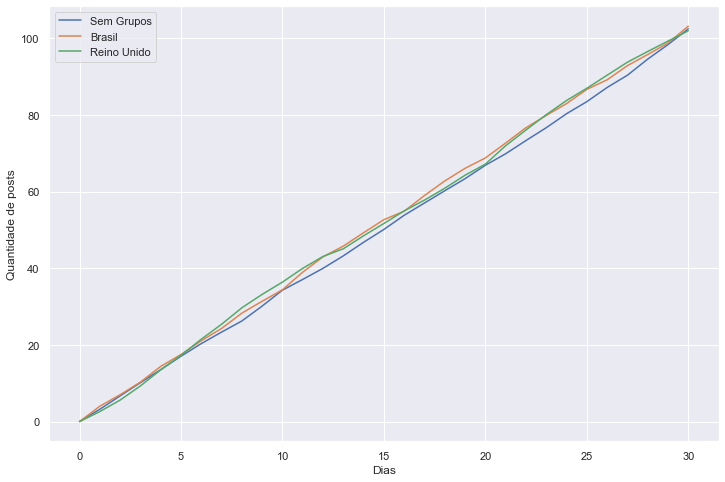

In [8]:
fig, ax = plt.subplots(figsize=((12,8)))
no_pg_df[['step', 'fakenews_posts']].groupby('step').mean().plot(ax=ax, label='Sem Grupos')
pg_BR_df[['step', 'fakenews_posts']].groupby('step').mean().plot(ax=ax, label='Brasil')
pg_UK_df[['step', 'fakenews_posts']].groupby('step').mean().plot(ax=ax, label='Reino Unido')
ax.legend(['Sem Grupos', 'Brasil', 'Reino Unido'])
ax.set_xlabel('Dias')
ax.set_ylabel('Quantidade de posts')
#ax.set_title('Número de fakenews originais produzidas', fontsize=18)

Text(0, 0.5, 'Quantidade de posts')

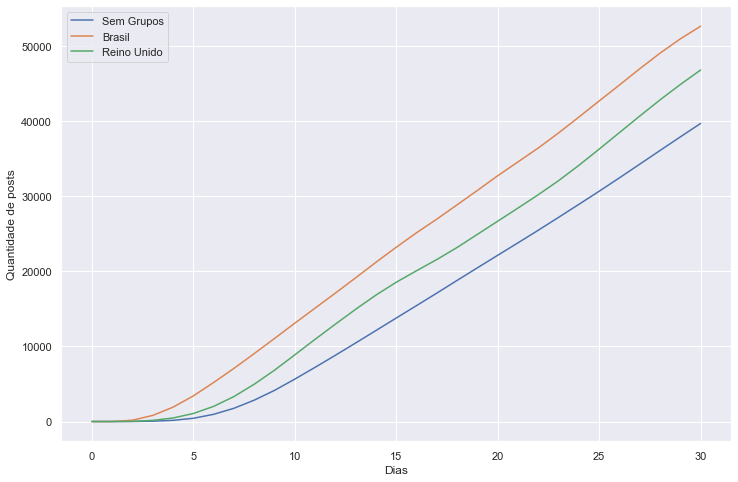

In [9]:
fig, ax = plt.subplots(figsize=((12,8)))
no_pg_df[['step', 'fakenews_shared']].groupby('step').mean().plot(ax=ax, label='Sem Grupos')
pg_BR_df[['step', 'fakenews_shared']].groupby('step').mean().plot(ax=ax, label='Brasil')
pg_UK_df[['step', 'fakenews_shared']].groupby('step').mean().plot(ax=ax, label='Reino Unido')
ax.legend(['Sem Grupos', 'Brasil', 'Reino Unido'])
ax.set_xlabel('Dias')
ax.set_ylabel('Quantidade de posts')
#ax.set_title('Número de fakenews compartilhadas', fontsize=18)

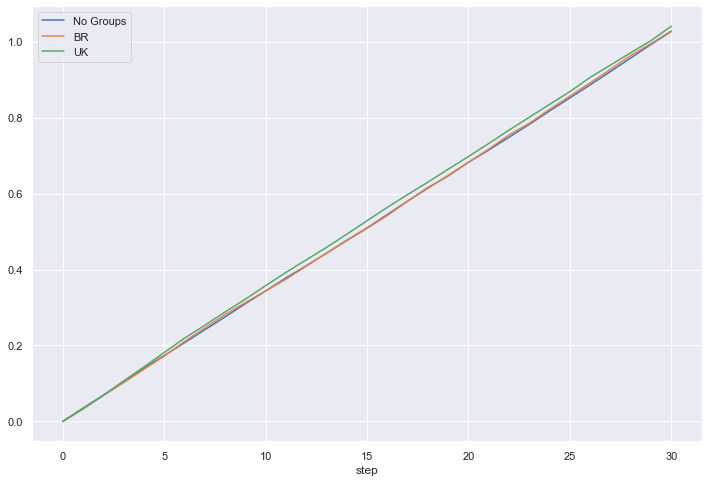

In [10]:
fig, ax = plt.subplots(figsize=((12,8)))
no_pg_df[['step', 'avg_posts_per_user']].groupby('step').mean().plot(ax=ax, label='No Groups')
pg_BR_df[['step', 'avg_posts_per_user']].groupby('step').mean().plot(ax=ax, label='BR')
pg_UK_df[['step', 'avg_posts_per_user']].groupby('step').mean().plot(ax=ax, label='UK')
ax.legend(['No Groups', 'BR', 'UK'])

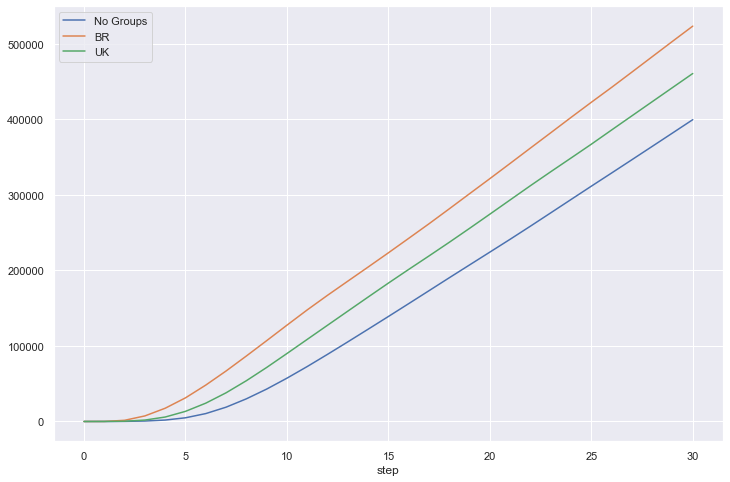

In [11]:
fig, ax = plt.subplots(figsize=((12,8)))
no_pg_df[['step', 'total_posts']].groupby('step').mean().plot(ax=ax, label='No Groups')
pg_BR_df[['step', 'total_posts']].groupby('step').mean().plot(ax=ax, label='BR')
pg_UK_df[['step', 'total_posts']].groupby('step').mean().plot(ax=ax, label='UK')
ax.legend(['No Groups', 'BR', 'UK'])